In [1]:
# Importando os módulos que serão utilizados

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import time
import dill
import pandas as pd
import plotly.express as ply_exp
import plotly.graph_objects as ply_go

# Importando os módulos contendo as funções criadas no projeto

from aux_func_V3 import *
import API_Numpy
import API_TensorFlow

float_pres = "float64"

In [10]:
# BI : Função de mapeamento do Henrick nas extremidades
# BI2: Função identidade corrigida nas extremidades

# nomes = [
#     "WENO-JS", "WENO-JS (M)", "WENO-JS (MS)", "WENO-JS (BI)",
#     "WENO-Z" , "WENO-Z (M)" , "WENO-Z (MS)" , "WENO-Z (BI)" , 
#     "WENO-Z+", "WENO-Z+ (M)", "WENO-Z+ (MS)", "WENO-Z+ (BI)",
#     "WENO-ZC (M)", "WENO-ZC (MS)", "WENO-ZC (BI)"
# ]
# cores = [
#     "273EAF", "5B7BD7", "8EA9F1", "BEC7FF", # WENO-JS: Azul
#     "A41127", "DD5C5B", "FF8891", "FFC2D0", # WENO-Z : Vermelho
#     "A45705", "D26F1C", "F2944A", "FFC29A", # WENO-Z+: Laranja
#     "41631D", "5B9940", "9CD87B", "DBF7C1"  # WENO-ZC: Verde
# ]

# API      = API_Numpy
# equation = transp_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = WENO_JS(   API, equation, γ=γ).Sim
# WENOs[nomes[ 1]] = WENO_JS_M( API, equation, γ=γ).Sim
# WENOs[nomes[ 2]] = WENO_JS_MS(API, equation, γ=γ).Sim
# WENOs[nomes[ 3]] = WENO_JS_BI(API, equation, γ=γ).Sim

# WENOs[nomes[ 4]] = WENO_Z(   API, equation, γ=γ).Sim
# WENOs[nomes[ 5]] = WENO_Z_M( API, equation, γ=γ).Sim
# WENOs[nomes[ 6]] = WENO_Z_MS(API, equation, γ=γ).Sim
# WENOs[nomes[ 7]] = WENO_Z_BI(API, equation, γ=γ).Sim

# WENOs[nomes[ 8]] = WENO_Zp(   API, equation, γ=γ).Sim
# WENOs[nomes[ 9]] = WENO_Zp_M( API, equation, γ=γ).Sim
# WENOs[nomes[10]] = WENO_Zp_MS(API, equation, γ=γ).Sim
# WENOs[nomes[11]] = WENO_Zp_BI(API, equation, γ=γ).Sim

# WENOs[nomes[12]] = WENO_ZC_M( API, equation, γ=γ).Sim
# WENOs[nomes[13]] = WENO_ZC_MS(API, equation, γ=γ).Sim
# WENOs[nomes[14]] = WENO_ZC_BI(API, equation, γ=γ).Sim

# nomes = [
#     "WENO-JS", "WENO-JS (MS)", "WENO-JS (BI)", "WENO-JS (BI2)",
#     "WENO-Z" , "WENO-Z (MS)" , "WENO-Z (BI)" , "WENO-Z (BI2)" , 
#     "WENO-Z+", "WENO-ZC (MS)", "WENO-ZC (BI)", "WENO-ZC (BI2)"
# ]
# cores = [
#     "#273EAF", "#5B7BD7", "#8EA9F1", "#BEC7FF", # WENO-JS: Azul
#     "#A41127", "#DD5C5B", "#FF8891", "#FFC2D0", # WENO-Z : Vermelho
#     "#41631D", "#5B9940", "#9CD87B", "#DBF7C1"  # WENO-ZC: Verde
# ]

# API      = API_Numpy
# equation = transp_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 1]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 2]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 3]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim

# WENOs[nomes[ 4]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 5]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 6]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 7]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim

# WENOs[nomes[ 8]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 9]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[10]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[11]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim

# nomes = [
#     "WENO-Z", "WENO-Z (BI)", "WENO-Z (BI2)",
#     "WENO-D", "WENO-D (BI)", "WENO-D (BI2)",
#     "WENO-A", "WENO-A (BI)", "WENO-A (BI2)"
# ]
# cores = [
#     "#273EAF", "#5B7BD7", "#8EA9F1", # WENO-Z: Azul
#     "#A41127", "#DD5C5B", "#FF8891", # WENO-D: Vermelho
#     "#41631D", "#5B9940", "#9CD87B"  # WENO-A: Verde
# ]

# API      = API_Numpy
# equation = transp_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 1]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 2]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 3]] = simulation(API, equation, WENO_D_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 4]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_mapping , map_function=BI_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 5]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 6]] = simulation(API, equation, WENO_A_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 7]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_mapping , map_function=BI_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 8]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).Sim

# nomes = [
#     "WENO-Z" , "WENO-Z (BIm)" , "WENO-Z (BI)" , "WENO-Z (BIM)",
#     "WENO-Z+", "WENO-ZC (BIm)", "WENO-ZC (BI)", "WENO-ZC (BIM)"
# ]
# cores = [
#     "#A41127", "#DD5C5B", "#FF8891", "#FFC2D0", # WENO-Z : Vermelho
#     "#273EAF", "#5B7BD7", "#8EA9F1", "#BEC7FF"  # WENO-ZC: Azul
# ]

# API      = API_Numpy
# equation = transp_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 1]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BIm_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 2]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 3]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BIM_mapping , network=None, p=2, ε=ε_default).Sim

# WENOs[nomes[ 4]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 5]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BIm_mapping , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 6]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
# WENOs[nomes[ 7]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BIM_mapping , network=None, p=2, ε=ε_default).Sim

nomes = ["WENO-Z (BI)" , "Linear"]
cores = [
    "#A41127", "#DD5C5B", "#FF8891", # WENO-Z : Vermelho
    "#273EAF", "#5B7BD7", "#8EA9F1"  # WENO-ZC: Azul
]

API      = API_Numpy
equation = transp_equation
γ        = 1.4

WENOs = {}

WENOs[nomes[ 0]] = simulation(API, equation, WENO_Z_scheme     , γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).Sim
WENOs[nomes[ 1]] = simulation(API, equation, WENO_linear_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).Sim


In [3]:
Δx = 0.01

# f_test = lambda x: np.where(x > 0.5, 0.0, 1.0)*np.where(x < -0.5, 0.0, 1.0)

def f_test(x):
    z = tf.constant(-0.7, dtype=dtype)
    δ = tf.constant(0.005, dtype=dtype)
    β = tf.math.log(tf.constant(2.0, dtype=dtype))/(36.0*(δ**2.0))
    a = tf.constant(0.5, dtype=dtype)
    α = tf.constant(10, dtype=dtype)
    
    def G(x, β, z):
        return tf.math.exp(-β*(x-z)**2)
    
    def F(x, α, a):
        return tf.math.sqrt(tf.math.maximum(1-(α**2)*((x-a)**2),0))
    
    f1 = (G(x, β, z-δ) + 4*G(x, β, z) + G(x, β, z+δ))/6 # x in [-0.8, -0.6]
    f2 = 1                                              # x in [-0.4, -0.2]
    f3 = 1-tf.math.abs(10*(x-0.1))                      # x in [ 0.0,  0.2]
    f4 = (F(x, α, a-δ) + 4*F(x, α, a) + F(x, α, a+δ))/6 # x in [ 0.4,  0.6]
    f5 = 0                                              # otherwise
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, -0.8),
        tf.math.less_equal(x, -0.6)
    )
    f1 = f1*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, -0.4),
        tf.math.less_equal(x, -0.2)
    )
    f2 = f2*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, 0.0),
        tf.math.less_equal(x, 0.2)
    )
    f3 = f3*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, 0.4),
        tf.math.less_equal(x, 0.6)
    )
    f4 = f4*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    f = f1 + f2 + f3 + f4 + f5
    
    return f

In [4]:
t_final = 2
n       = 400
CFL     = 0.2
fator   = 10   # Quantas vezes menor é a malha para a solução de referência

fronteira = FronteiraPeriodica

Δx = 2/n
x  = tf.range(-1, 1, Δx, dtype=dtype)
u  = {}
for nome in nomes:
    u[nome] = WENOs[nome](f_test(x), t_final, Δx, CFL, fronteira)
    print(nome + "              ")

u["WENO-Z (BI)-Linear"]      = WENOs["Linear"](     u["WENO-Z (BI)"], t_final, Δx, CFL, fronteira)
print("WENO-Z (BI)-Linear" + "              ")
u["WENO-Z (BI)-WENO-Z (BI)"] = WENOs["WENO-Z (BI)"](u["WENO-Z (BI)"], t_final, Δx, CFL, fronteira)
print("WENO-Z (BI)-WENO-Z (BI)" + "              ")
u["Linear-Linear"]           = WENOs["Linear"](     u["Linear"], t_final, Δx, CFL, fronteira)
print("Linear-Linear" + "              ")
u["Linear-WENO-Z (BI)"]      = WENOs["WENO-Z (BI)"](u["Linear"], t_final, Δx, CFL, fronteira)
print("Linear-WENO-Z (BI)" + "              ")

nomes.append("WENO-Z (BI)-Linear")
nomes.append("WENO-Z (BI)-WENO-Z (BI)")
nomes.append("Linear-Linear")
nomes.append("Linear-WENO-Z (BI)")

n_ref  = n*fator
Δx_ref = 2/n_ref

WENO-Z (BI)              
Linear              
WENO-Z (BI)-Linear              
WENO-Z (BI)-WENO-Z (BI)              
Linear-Linear              
Linear-WENO-Z (BI)              


In [11]:
nomes = ["WENO-Z (BI)" , "Linear", "WENO-Z (BI)-Linear", "WENO-Z (BI)-WENO-Z (BI)", "Linear-Linear", "Linear-WENO-Z (BI)"]

In [12]:
x     = tf.range(-1, 1, Δx, dtype=float_pres)
y     = u[nomes[0]]
label = tf.repeat([nomes[0]], [len(u[nomes[0]])])

for i in range(1, len(nomes)):
    x = tf.concat([x, tf.range(-1, 1, Δx, dtype=float_pres)], axis = 0)
    y = tf.concat([y, u[nomes[i]]], axis = 0)
    label = tf.concat([label, tf.repeat([nomes[i]], [len(u[nomes[i]])])], axis = 0)

df = pd.DataFrame(
    {
        "x"     : x     ,
        "y"     : y     ,
        "label" : label
    }
)

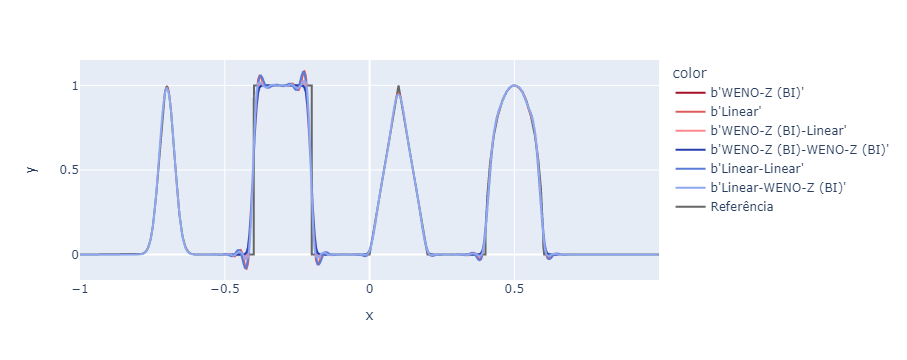

In [13]:
fig = ply_exp.line(
    data_frame = df    ,
    x          = x     ,
    y          = y     ,
    color      = label ,
    color_discrete_sequence = cores
)
fig.add_trace(
    ply_go.Scatter(
        x    = tf.range(-1, 1, Δx_ref, dtype=float_pres)         ,
        y    = f_test(tf.range(-1, 1, Δx_ref, dtype=float_pres)) , # u_ref, 
        mode = "lines"                                           ,
        line = ply_go.scatter.Line(color="#666666")              ,
        name = "Referência"
    )
)
fig.show()

In [14]:
fig.write_html("htmls/formas teste com pesos ideais.html")